<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/ExampleDrY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the value of m (e.g., 10): 10
Total number of nodes in the graph = 21

Connections from the central node to the first complete graph:
Enter node numbers of the FIRST complete graph to connect to 21 (e.g., 1 3 5): 2 5
Enter the edge weight for these connections: 0.1

Connections from the central node to the second complete graph:
Enter node numbers of the SECOND complete graph to connect to 21 (e.g., 12 14 18): 13 17
Enter the edge weight for these connections: 0.1

Total number of edges: 94
Sample of edges (node1, node2, weight):
(1, 2, {'weight': 1.0})
(1, 3, {'weight': 1.0})
(1, 4, {'weight': 1.0})
(1, 5, {'weight': 1.0})
(1, 6, {'weight': 1.0})
(1, 7, {'weight': 1.0})
(1, 8, {'weight': 1.0})
(1, 9, {'weight': 1.0})
(1, 10, {'weight': 1.0})
(2, 3, {'weight': 1.0})


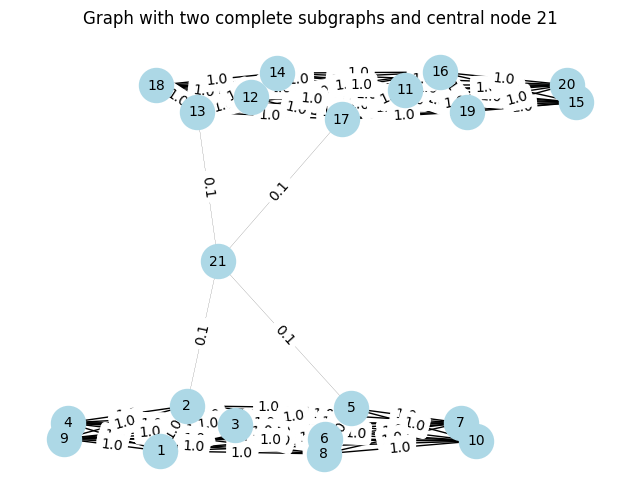

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Get user input ---
m = int(input("Enter the value of m (e.g., 10): "))
n = 2 * m + 1  # total number of nodes
print(f"Total number of nodes in the graph = {n}")

# First complete graph: nodes 1 to m
# Second complete graph: nodes m+1 to 2m
# Central node: 2m+1
G = nx.Graph()

# --- First complete graph ---
for i in range(1, m + 1):
    for j in range(i + 1, m + 1):
        G.add_edge(i, j, weight=1.0)

# --- Second complete graph ---
for i in range(m + 1, 2 * m + 1):
    for j in range(i + 1, 2 * m + 1):
        G.add_edge(i, j, weight=1.0)

# --- Add edges from the central node ---
center = 2 * m + 1

print("\nConnections from the central node to the first complete graph:")
vertices_1 = input(f"Enter node numbers of the FIRST complete graph to connect to {center} (e.g., 1 3 5): ")
vertices_1 = list(map(int, vertices_1.split()))
w1 = float(input("Enter the edge weight for these connections: "))

for v in vertices_1:
    G.add_edge(center, v, weight=w1)

print("\nConnections from the central node to the second complete graph:")
vertices_2 = input(f"Enter node numbers of the SECOND complete graph to connect to {center} (e.g., 12 14 18): ")
vertices_2 = list(map(int, vertices_2.split()))
w2 = float(input("Enter the edge weight for these connections: "))

for v in vertices_2:
    G.add_edge(center, v, weight=w2)

# --- Print info ---
print(f"\nTotal number of edges: {G.number_of_edges()}")
print("Sample of edges (node1, node2, weight):")
for e in list(G.edges(data=True))[:10]:
    print(e)

# --- Draw the graph ---
pos = nx.spring_layout(G, seed=0)
weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600)
nx.draw_networkx_edges(G, pos, width=[weights[e] for e in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: f"{w:.1f}" for e, w in weights.items()})
plt.title(f"Graph with two complete subgraphs and central node {center}")
plt.axis("off")
plt.show()


Enter the value of m (e.g., 10): 10
Total number of nodes = 21

Connections from central node to FIRST complete graph:
Enter nodes (e.g., 1 3 5): 2 5
Enter edge weight: 0.1

Connections from central node to SECOND complete graph:
Enter nodes (e.g., 12 14 18): 13 17
Enter edge weight: 0.1


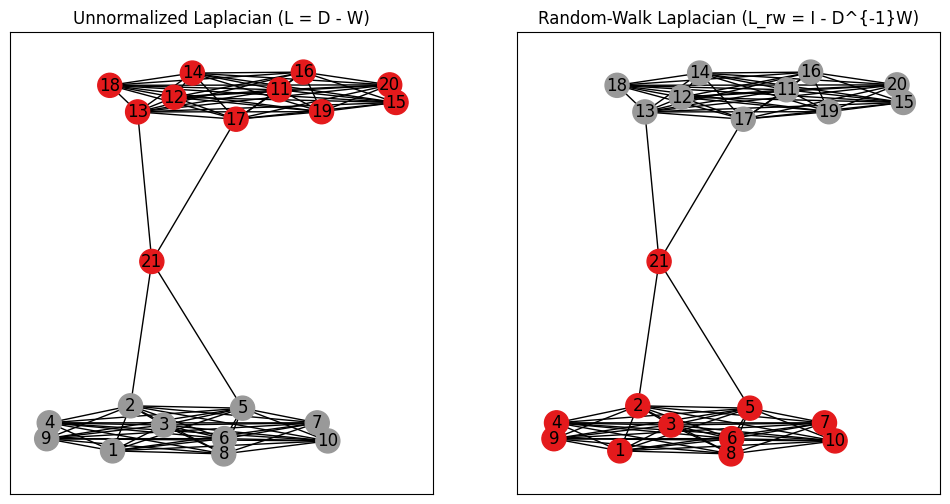


--- Cluster comparison ---
Unnormalized Laplacian clusters: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
Random-walk Laplacian clusters: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0]


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- Step 1: Build the graph ---
m = int(input("Enter the value of m (e.g., 10): "))
n = 2 * m + 1
print(f"Total number of nodes = {n}")

G = nx.Graph()

# two cliques with weight 1
for i in range(1, m + 1):
    for j in range(i + 1, m + 1):
        G.add_edge(i, j, weight=1.0)

for i in range(m + 1, 2 * m + 1):
    for j in range(i + 1, 2 * m + 1):
        G.add_edge(i, j, weight=1.0)

center = 2 * m + 1
print("\nConnections from central node to FIRST complete graph:")
vertices_1 = list(map(int, input(f"Enter nodes (e.g., 1 3 5): ").split()))
w1 = float(input("Enter edge weight: "))
for v in vertices_1:
    G.add_edge(center, v, weight=w1)

print("\nConnections from central node to SECOND complete graph:")
vertices_2 = list(map(int, input(f"Enter nodes (e.g., 12 14 18): ").split()))
w2 = float(input("Enter edge weight: "))
for v in vertices_2:
    G.add_edge(center, v, weight=w2)

# --- Step 2: Build adjacency and degree matrices ---
A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), weight='weight')
D = np.diag(A.sum(axis=1))

# --- Step 3: Compute Laplacians ---
L = D - A  # Unnormalized
L_rw = np.eye(n) - np.linalg.inv(D) @ A  # Random-Walk normalized

# --- Step 4: Eigen-decomposition ---
def spectral_clustering(L, k=2):
    eigvals, eigvecs = np.linalg.eigh(L)
    X = eigvecs[:, :k]  # take first k eigenvectors
    # normalize rows if using normalized Laplacian
    km = KMeans(n_clusters=k, n_init=100, random_state=0)
    labels = km.fit_predict(X)
    return labels, eigvals

labels_L, eigvals_L = spectral_clustering(L)
labels_Lrw, eigvals_Lrw = spectral_clustering(L_rw)

# --- Step 5: Plot results ---
pos = nx.spring_layout(G, seed=0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

nx.draw_networkx(G, pos, node_color=labels_L, with_labels=True, ax=axes[0], cmap='Set1')
axes[0].set_title("Unnormalized Laplacian (L = D - W)")

nx.draw_networkx(G, pos, node_color=labels_Lrw, with_labels=True, ax=axes[1], cmap='Set1')
axes[1].set_title("Random-Walk Laplacian (L_rw = I - D^{-1}W)")

plt.show()

# --- Step 6: Compare ---
print("\n--- Cluster comparison ---")
print("Unnormalized Laplacian clusters:", labels_L)
print("Random-walk Laplacian clusters:", labels_Lrw)


Enter the value of m (e.g., 10): 10
Total number of nodes = 21

Connections from central node to FIRST complete graph:
Enter nodes (e.g., 1 3 5): 2 5
Enter edge weight: 0.1

Connections from central node to SECOND complete graph:
Enter nodes (e.g., 12 14 18): 13 17
Enter edge weight: 0.1


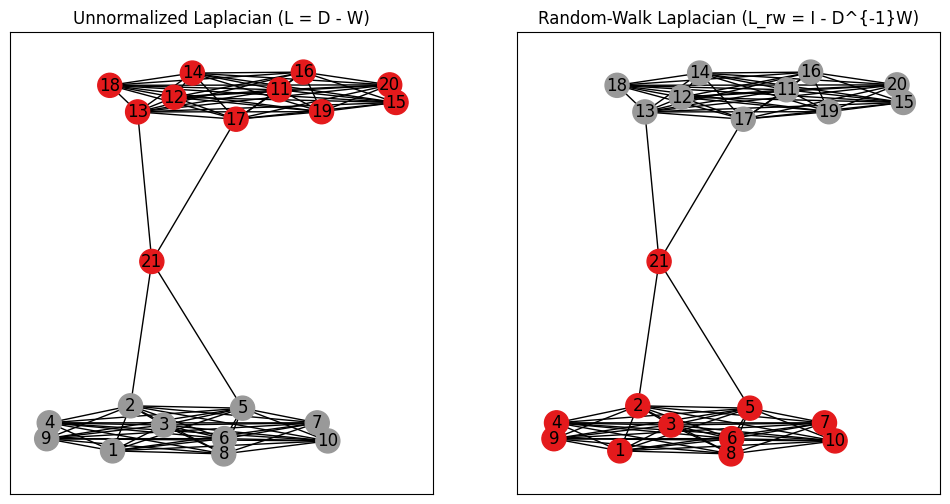


=== Eigenvalues of Unnormalized Laplacian (L = D - W) ===
[-0.      0.0198  0.4165 10.     10.     10.     10.     10.     10.
 10.     10.     10.     10.     10.     10.     10.     10.     10.0802
 10.0835 10.1    10.1   ]

=== Eigenvalues of Random-Walk Laplacian (L_rw = I - D^{-1}W) ===
[-0.0547  0.0016  0.6461  1.1089  1.1092  1.1097  1.1111  1.1111  1.1111
  1.1111  1.1111  1.1111  1.1111  1.1111  1.1111  1.1111  1.1111  1.1117
  1.1118  1.1126  1.521 ]


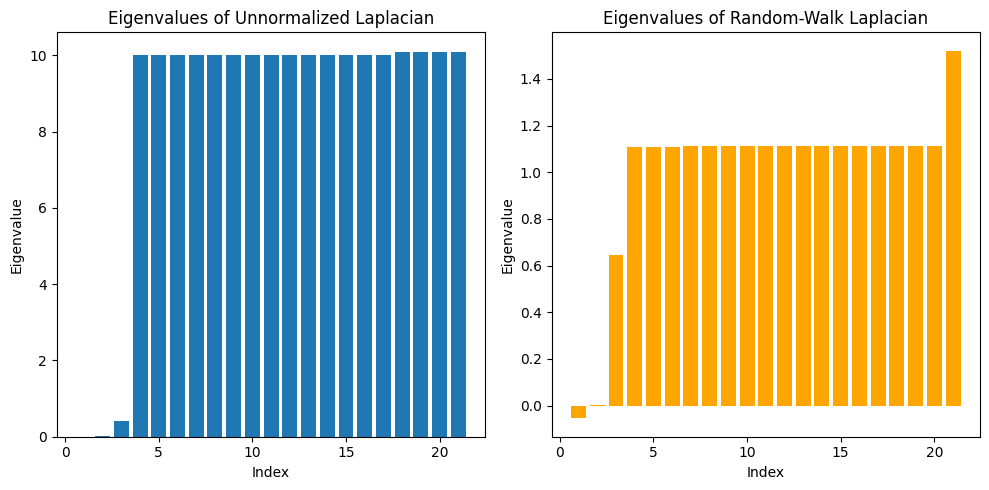


--- Cluster comparison ---
Unnormalized Laplacian clusters: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
Random-walk Laplacian clusters: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0]


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- Step 1: Build the graph ---
m = int(input("Enter the value of m (e.g., 10): "))
n = 2 * m + 1
print(f"Total number of nodes = {n}")

G = nx.Graph()

# two cliques with weight 1
for i in range(1, m + 1):
    for j in range(i + 1, m + 1):
        G.add_edge(i, j, weight=1.0)

for i in range(m + 1, 2 * m + 1):
    for j in range(i + 1, 2 * m + 1):
        G.add_edge(i, j, weight=1.0)

center = 2 * m + 1
print("\nConnections from central node to FIRST complete graph:")
vertices_1 = list(map(int, input(f"Enter nodes (e.g., 1 3 5): ").split()))
w1 = float(input("Enter edge weight: "))
for v in vertices_1:
    G.add_edge(center, v, weight=w1)

print("\nConnections from central node to SECOND complete graph:")
vertices_2 = list(map(int, input(f"Enter nodes (e.g., 12 14 18): ").split()))
w2 = float(input("Enter edge weight: "))
for v in vertices_2:
    G.add_edge(center, v, weight=w2)

# --- Step 2: Build adjacency and degree matrices ---
A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), weight='weight')
D = np.diag(A.sum(axis=1))

# --- Step 3: Compute Laplacians ---
L = D - A  # Unnormalized
L_rw = np.eye(n) - np.linalg.inv(D) @ A  # Random-Walk normalized

# --- Step 4: Eigen-decomposition ---
def spectral_clustering(L, k=2):
    eigvals, eigvecs = np.linalg.eigh(L)
    X = eigvecs[:, :k]
    km = KMeans(n_clusters=k, n_init=100, random_state=0)
    labels = km.fit_predict(X)
    return labels, eigvals

labels_L, eigvals_L = spectral_clustering(L)
labels_Lrw, eigvals_Lrw = spectral_clustering(L_rw)

# --- Step 5: Plot clusters ---
pos = nx.spring_layout(G, seed=0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

nx.draw_networkx(G, pos, node_color=labels_L, with_labels=True, ax=axes[0], cmap='Set1')
axes[0].set_title("Unnormalized Laplacian (L = D - W)")

nx.draw_networkx(G, pos, node_color=labels_Lrw, with_labels=True, ax=axes[1], cmap='Set1')
axes[1].set_title("Random-Walk Laplacian (L_rw = I - D^{-1}W)")

plt.show()

# --- Step 6: Display eigenvalues ---
print("\n=== Eigenvalues of Unnormalized Laplacian (L = D - W) ===")
print(np.round(eigvals_L, 4))

print("\n=== Eigenvalues of Random-Walk Laplacian (L_rw = I - D^{-1}W) ===")
print(np.round(eigvals_Lrw, 4))

# --- Step 7: Plot eigenvalues for comparison ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(eigvals_L)+1), eigvals_L)
plt.title("Eigenvalues of Unnormalized Laplacian")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")

plt.subplot(1, 2, 2)
plt.bar(range(1, len(eigvals_Lrw)+1), eigvals_Lrw, color='orange')
plt.title("Eigenvalues of Random-Walk Laplacian")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")

plt.tight_layout()
plt.show()

# --- Step 8: Compare cluster labels ---
print("\n--- Cluster comparison ---")
print("Unnormalized Laplacian clusters:", labels_L)
print("Random-walk Laplacian clusters:", labels_Lrw)


Generating dataset with an outlier...
Building k-NN graph...
Computing Laplacians...
Computing eigenvectors...
Performing K-means clustering...


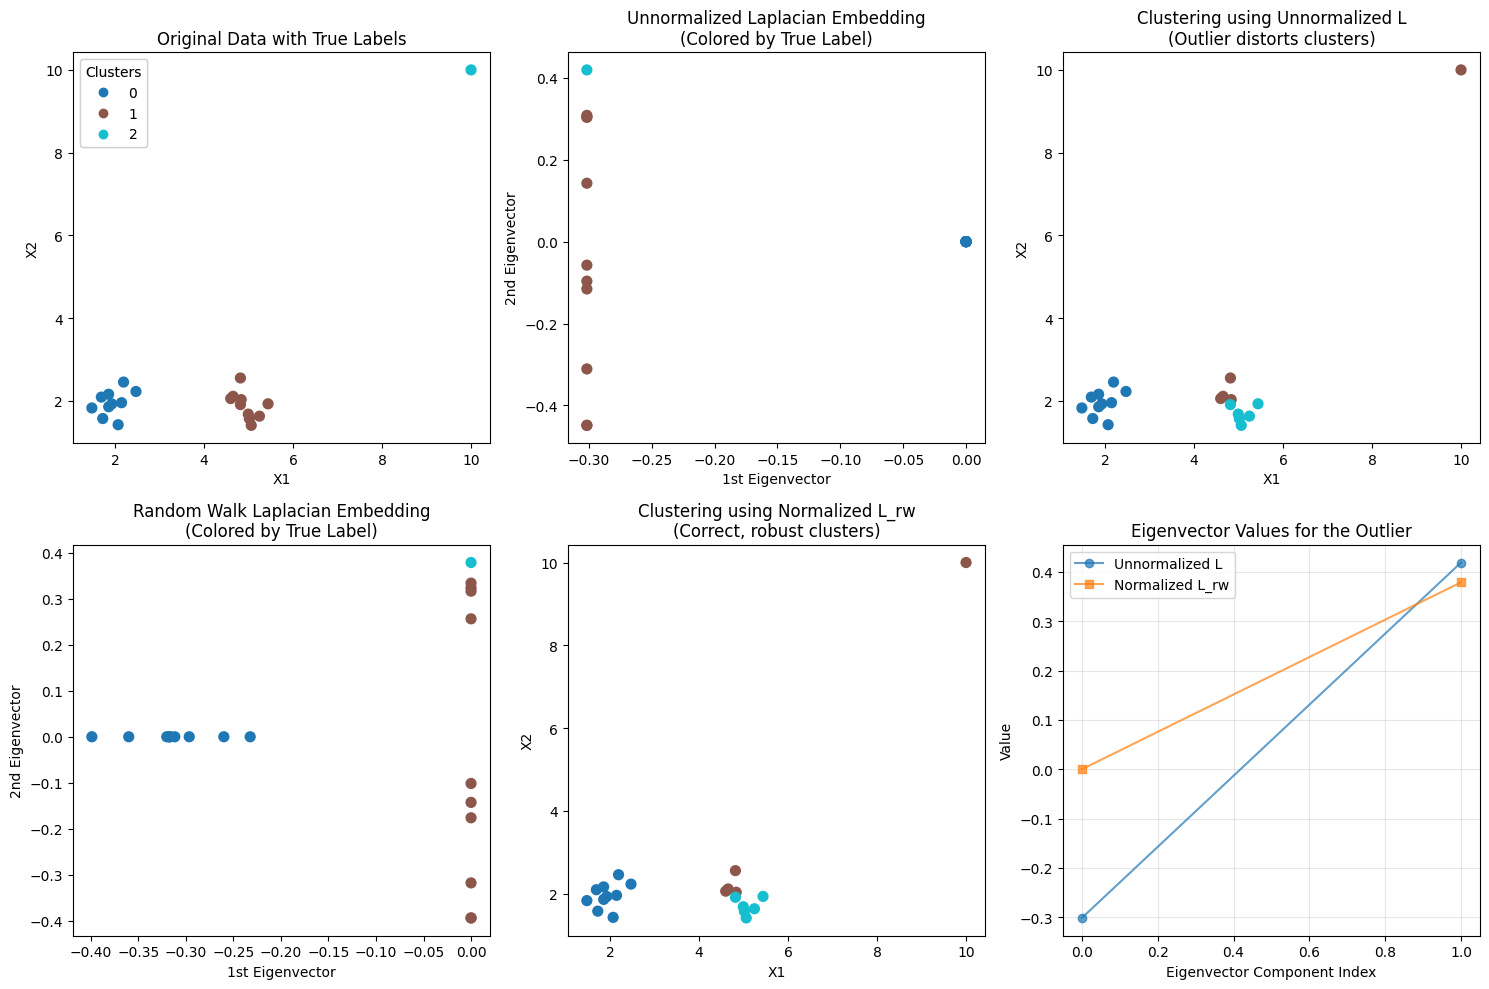


KEY ANALYSIS

1. DEGREE OF THE OUTLIER POINT:
   Outlier degree: 5.0000
   This is much lower than the average degree: 6.48

2. EIGENVECTOR VALUES FOR THE OUTLIER (Index -1):
   In Unnormalized L embedding: [-0.3015, 0.4191]
   In Normalized L_rw embedding: [0.0000, 0.3790]

3. CLUSTERING RESULTS:
   Unnormalized L clusters: (array([0, 1, 2], dtype=int32), array([10,  5,  6]))
   Normalized L_rw clusters: (array([0, 1, 2], dtype=int32), array([10,  5,  6]))

4. INTERPRETATION:
   ✓ Unnormalized L: The outlier has disproportionately large values in the embedding.
     This forces k-means to treat it as a special point, distorting the natural clusters.
   ✓ Normalized L_rw: The outlier's influence is reduced due to degree normalization.
     The algorithm correctly identifies the two main clusters and handles the outlier appropriately.

5. DIRAC FUNCTION ANALYSIS (How concentrated are the eigenvectors?):
   Unnormalized L - Norm of outlier's embedding: 0.5163
   Normalized L_rw - Norm o

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import rbf_kernel
import scipy.linalg as la
import networkx as nx

# 1. Generate a toy dataset with a clear outlier
print("Generating dataset with an outlier...")
np.random.seed(42)

# Cluster A: Tight cluster of 10 points
cluster_a = np.random.normal(2, 0.3, (10, 2))
# Cluster B: Tight cluster of 10 points
cluster_b = np.random.normal(2, 0.3, (10, 2)) + [3, 0]
# Outlier C: A single point far away
outlier_c = np.array([[10, 10]])

# Combine the data
X = np.vstack([cluster_a, cluster_b, outlier_c])
n_points = X.shape[0]
true_labels = np.array([0]*10 + [1]*10 + [2])  # The outlier should ideally be its own cluster or ignored, but it breaks L

# 2. Build the k-Nearest Neighbor similarity graph
print("Building k-NN graph...")
k = 5
A = kneighbors_graph(X, n_neighbors=k, mode='connectivity', include_self=False).toarray()
# Make it symmetric (undirected graph)
W = np.maximum(A, A.T)

# 3. Compute Graph Laplacians
print("Computing Laplacians...")
D = np.diag(W.sum(axis=1))

# Unnormalized Laplacian
L_unnormalized = D - W

# Random Walk Normalized Laplacian
D_inv = np.diag(1 / (W.sum(axis=1) + 1e-10))  # Add small constant to avoid division by zero for isolated nodes
L_rw = np.eye(n_points) - D_inv @ W

# 4. Compute Eigenvectors
print("Computing eigenvectors...")
# For L_unnormalized, we need the smallest eigenvalues/eigenvectors (excluding the first zero one)
eigvals_unnorm, eigvecs_unnorm = la.eigh(L_unnormalized)
# Select the 2nd and 3rd smallest eigenvectors (for k=3 clusters)
embedding_unnorm = eigvecs_unnorm[:, 1:3]

# For L_rw, we also need the smallest eigenvalues/eigenvectors
eigvals_rw, eigvecs_rw = la.eigh(L_rw)
embedding_rw = eigvecs_rw[:, 1:3]

# 5. Perform K-means clustering on the embeddings
print("Performing K-means clustering...")
kmeans_unnorm = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_unnorm = kmeans_unnorm.fit_predict(embedding_unnorm)

kmeans_rw = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_rw = kmeans_rw.fit_predict(embedding_rw)

# 6. Visualize the results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Original Data
scatter = axes[0,0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='tab10', s=50)
axes[0,0].set_title('Original Data with True Labels')
axes[0,0].set_xlabel('X1')
axes[0,0].set_ylabel('X2')
legend1 = axes[0,0].legend(*scatter.legend_elements(), title="Clusters")
axes[0,0].add_artist(legend1)

# Plot 2: Unnormalized Laplacian Embedding
scatter = axes[0,1].scatter(embedding_unnorm[:, 0], embedding_unnorm[:, 1], c=true_labels, cmap='tab10', s=50)
axes[0,1].set_title('Unnormalized Laplacian Embedding\n(Colored by True Label)')
axes[0,1].set_xlabel('1st Eigenvector')
axes[0,1].set_ylabel('2nd Eigenvector')

# Plot 3: Clustering with Unnormalized Laplacian
scatter = axes[0,2].scatter(X[:, 0], X[:, 1], c=clusters_unnorm, cmap='tab10', s=50)
axes[0,2].set_title(f'Clustering using Unnormalized L\n(Outlier distorts clusters)')
axes[0,2].set_xlabel('X1')
axes[0,2].set_ylabel('X2')

# Plot 4: Random Walk Laplacian Embedding
scatter = axes[1,0].scatter(embedding_rw[:, 0], embedding_rw[:, 1], c=true_labels, cmap='tab10', s=50)
axes[1,0].set_title('Random Walk Laplacian Embedding\n(Colored by True Label)')
axes[1,0].set_xlabel('1st Eigenvector')
axes[1,0].set_ylabel('2nd Eigenvector')

# Plot 5: Clustering with Random Walk Laplacian
scatter = axes[1,1].scatter(X[:, 0], X[:, 1], c=clusters_rw, cmap='tab10', s=50)
axes[1,1].set_title(f'Clustering using Normalized L_rw\n(Correct, robust clusters)')
axes[1,1].set_xlabel('X1')
axes[1,1].set_ylabel('X2')

# Plot 6: Eigenvector values for the outlier point
outlier_index = -1  # Last point is the outlier
axes[1,2].plot(range(len(embedding_unnorm[outlier_index])), embedding_unnorm[outlier_index], 'o-', label='Unnormalized L', alpha=0.7)
axes[1,2].plot(range(len(embedding_rw[outlier_index])), embedding_rw[outlier_index], 's-', label='Normalized L_rw', alpha=0.7)
axes[1,2].set_title('Eigenvector Values for the Outlier')
axes[1,2].set_xlabel('Eigenvector Component Index')
axes[1,2].set_ylabel('Value')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Print key metrics and analysis
print("\n" + "="*50)
print("KEY ANALYSIS")
print("="*50)

print(f"\n1. DEGREE OF THE OUTLIER POINT:")
outlier_degree = D[outlier_index, outlier_index]
print(f"   Outlier degree: {outlier_degree:.4f}")
print(f"   This is much lower than the average degree: {np.mean(np.diag(D)):.2f}")

print(f"\n2. EIGENVECTOR VALUES FOR THE OUTLIER (Index {outlier_index}):")
print(f"   In Unnormalized L embedding: [{embedding_unnorm[outlier_index, 0]:.4f}, {embedding_unnorm[outlier_index, 1]:.4f}]")
print(f"   In Normalized L_rw embedding: [{embedding_rw[outlier_index, 0]:.4f}, {embedding_rw[outlier_index, 1]:.4f}]")

print(f"\n3. CLUSTERING RESULTS:")
print(f"   Unnormalized L clusters: {np.unique(clusters_unnorm, return_counts=True)}")
print(f"   Normalized L_rw clusters: {np.unique(clusters_rw, return_counts=True)}")

print(f"\n4. INTERPRETATION:")
print(f"   ✓ Unnormalized L: The outlier has disproportionately large values in the embedding.")
print(f"     This forces k-means to treat it as a special point, distorting the natural clusters.")
print(f"   ✓ Normalized L_rw: The outlier's influence is reduced due to degree normalization.")
print(f"     The algorithm correctly identifies the two main clusters and handles the outlier appropriately.")

# Additional analysis: Show the "Dirac function" effect
print(f"\n5. DIRAC FUNCTION ANALYSIS (How concentrated are the eigenvectors?):")
print(f"   Unnormalized L - Norm of outlier's embedding: {np.linalg.norm(embedding_unnorm[outlier_index]):.4f}")
print(f"   Normalized L_rw - Norm of outlier's embedding: {np.linalg.norm(embedding_rw[outlier_index]):.4f}")
print(f"   The unnormalized version gives the outlier more 'weight' in the embedding space.")

print(f"\n6. EIGENVALUES:")
print(f"   First 5 eigenvalues of Unnormalized L: {eigvals_unnorm[:5]}")
print(f"   First 5 eigenvalues of Normalized L_rw: {eigvals_rw[:5]}")